In [83]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
titanic_df=pd.read_csv(r"file:///D:\GoFoProject\GOMYCODECHECKPOINTS\CHECKPOINT5\titanic-passengers.csv",delimiter=';')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [85]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
replaced_value=titanic_df['Age'].mean()
titanic_df['Age'].fillna(value=replaced_value, inplace=True)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
titanic_df=titanic_df.drop(['Cabin', 'Embarked'], axis=1)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [88]:
encoder=LabelEncoder()
titanic_df["Survived"]=encoder.fit_transform(titanic_df["Survived"])
titanic_df["Sex"]=encoder.fit_transform(titanic_df["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000


In [89]:
x = titanic_df[['Sex', 'Age']]
y = titanic_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

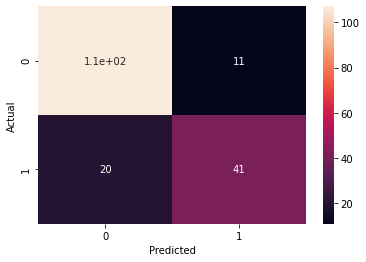

In [90]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       118
           1       0.79      0.67      0.73        61

    accuracy                           0.83       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



In [92]:
x = titanic_df[['Sex', 'Age']]
y = titanic_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.decision_function(x_test)

ROC curve(receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:True Positive Rate (TPR),False Positive Rate(FPR) and they both can be calculated from confusion matrix and it is usually used to compare between two models
AUC is the area under the ROC curve

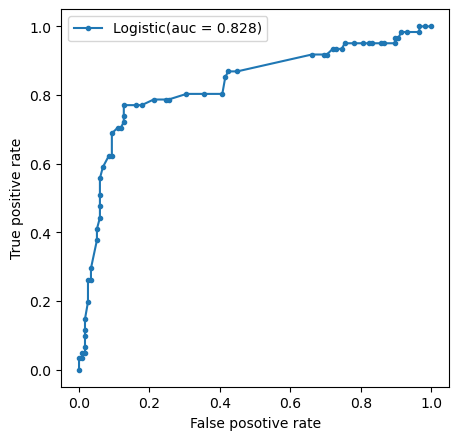

In [96]:
FPR,TPR,threshold=roc_curve(y_test,y_pred)
auc_logistic=auc(FPR,TPR)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(FPR,TPR,marker='.',label='Logistic(auc = %0.3f)' % auc_logistic)
plt.xlabel("False posotive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()